In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


In [ ]:
import io
records = pd.read_csv(io.BytesIO(uploaded['heart_failure_clinical_records_dataset.csv']))
heart_failure_data = records
# print(type(records))

In [ ]:
records.head()
#categorical = 6 (including death event)
#numeric = 6


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
records.shape

(299, 13)

In [ ]:
records.drop(columns=['time'], inplace=True)

In [ ]:
records.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64

In [ ]:
print(records.dtypes)

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
DEATH_EVENT                   int64
dtype: object


In [ ]:
categorical_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
records[categorical_columns] = records[categorical_columns].astype('category')

In [ ]:
records.dtypes

age                          float64
anaemia                     category
creatinine_phosphokinase       int64
diabetes                    category
ejection_fraction              int64
high_blood_pressure         category
platelets                    float64
serum_creatinine             float64
serum_sodium                   int64
sex                         category
smoking                     category
DEATH_EVENT                 category
dtype: object

In [ ]:
records.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000


# Variable by variable EDA

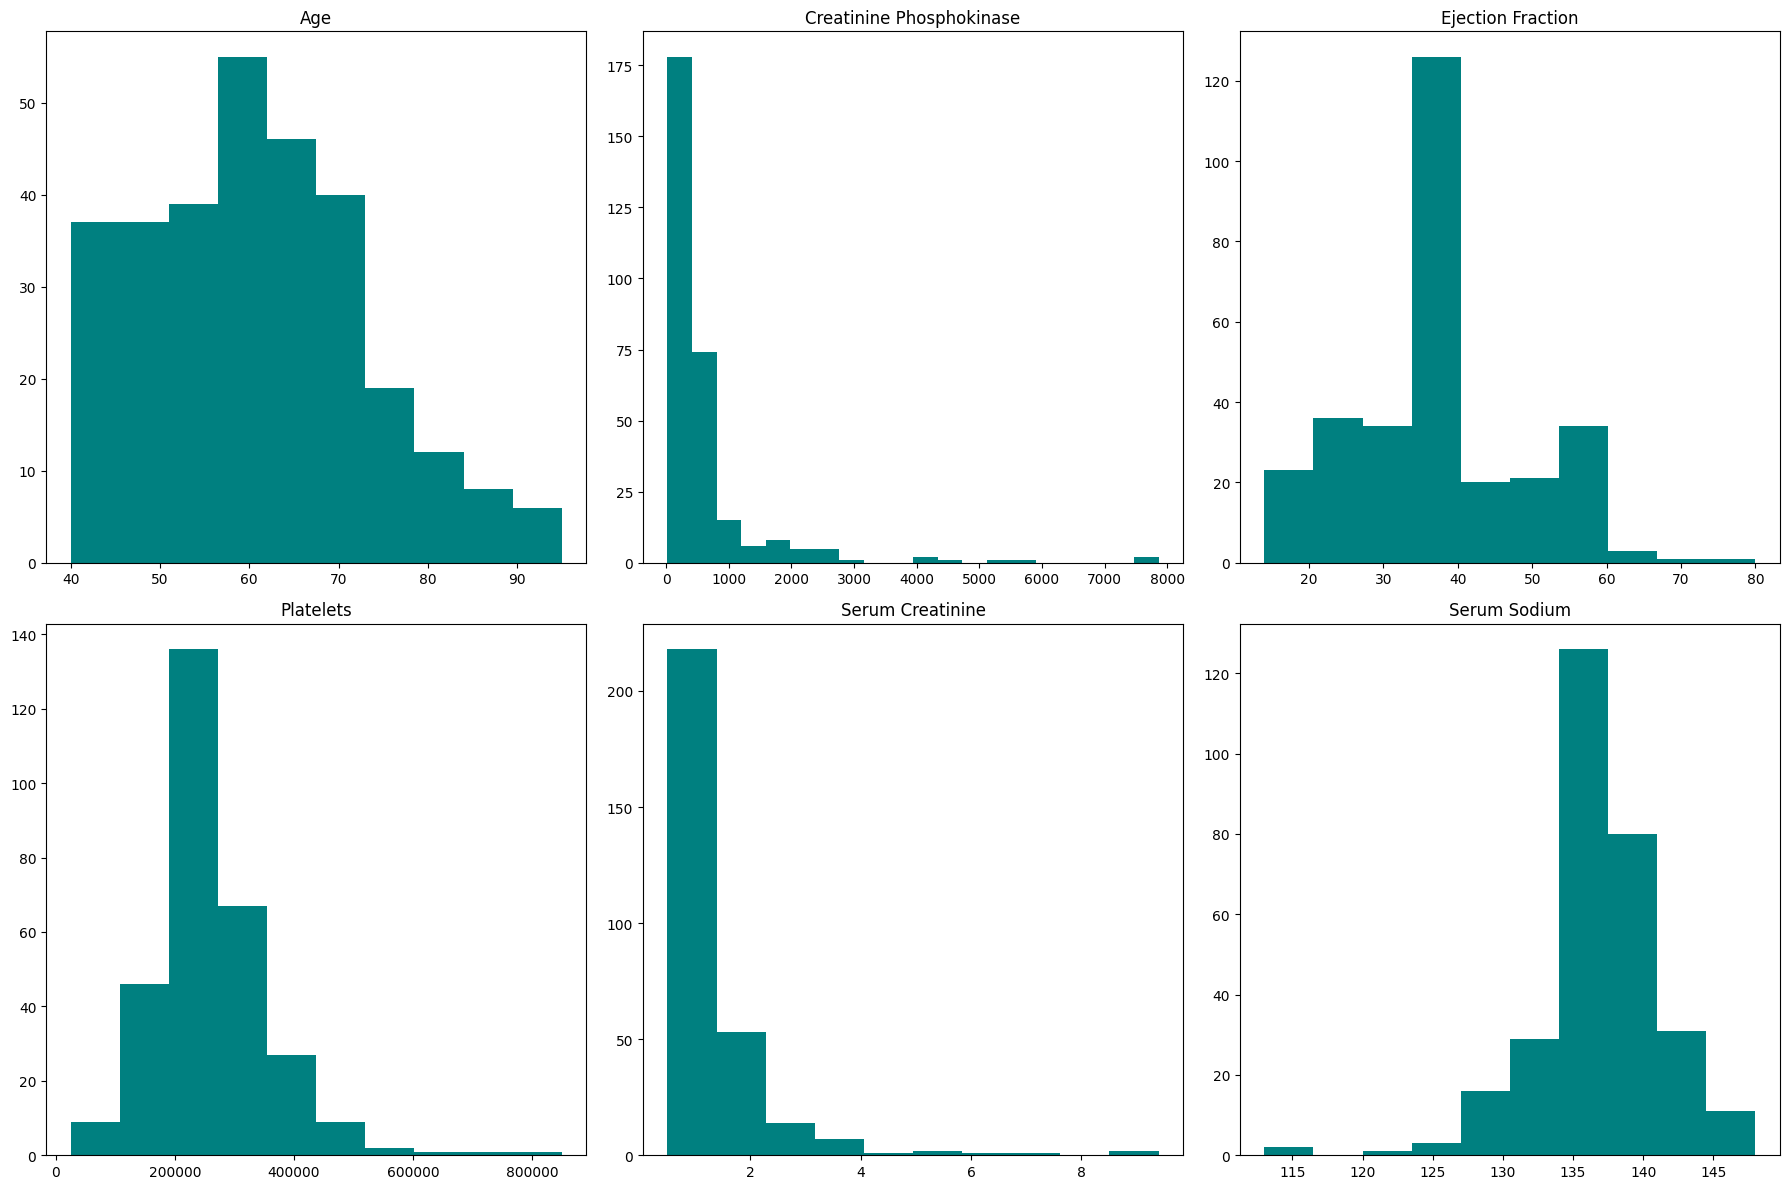

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12))


axs[0, 0].hist(records['age'], bins=10, color='teal')
axs[0, 0].set_title('Age')


axs[0, 1].hist(records['creatinine_phosphokinase'], bins=20, color='teal')
axs[0, 1].set_title('Creatinine Phosphokinase')


axs[0, 2].hist(records['ejection_fraction'], bins=10, color='teal')
axs[0, 2].set_title('Ejection Fraction')


axs[1, 0].hist(records['platelets'], bins=10, color='teal')
axs[1, 0].set_title('Platelets')


axs[1, 1].hist(records['serum_creatinine'], bins=10, color='teal')
axs[1, 1].set_title('Serum Creatinine')

axs[1, 2].hist(records['serum_sodium'], bins=10, color='teal')
axs[1, 2].set_title('Serum Sodium')


# Adjust layout
plt.tight_layout()
plt.show()


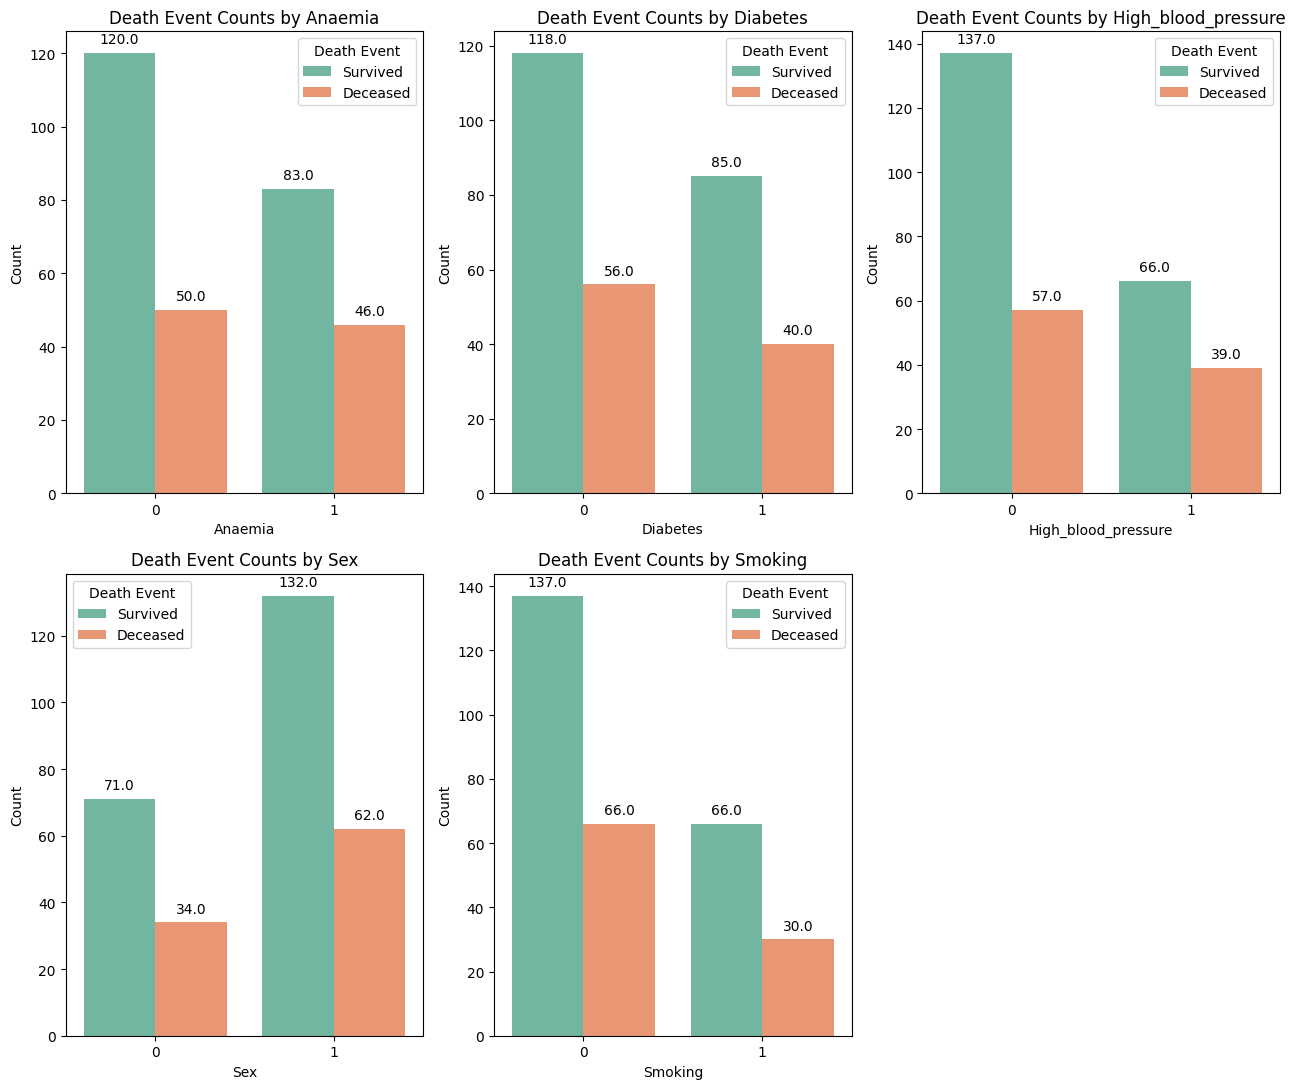

In [ ]:
categorical_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

plt.figure(figsize=(13, 11))

for i, cat_var in enumerate(categorical_vars, 1):
  plt.subplot(2, 3, i)
  sns.countplot(data=records, x=cat_var, hue='DEATH_EVENT', palette='Set2')
  plt.title(f'Death Event Counts by {cat_var.capitalize()}')
  plt.xlabel(f'{cat_var.capitalize()}')
  plt.ylabel('Count')
  plt.legend(title='Death Event', labels=['Survived', 'Deceased'])

  for p in plt.gca().patches:
    if p.get_height() != 0:
      plt.gca().annotate(format(p.get_height()),
      (p.get_x() + p.get_width() / 2., p.get_height()),
      ha='center', va='center',
      xytext=(0, 10),
      textcoords='offset points')

plt.tight_layout()
plt.show()

# Looking at Co-relations
The following visualizations will help us determine which factors (columns) have a correlation with a death event.

In [ ]:
print("The Number of duplicated values : ")
records.duplicated().sum()

The Number of duplicated values : 


0

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

male_survived = len(records[(records["DEATH_EVENT"]==0) & (records["sex"]==1)])
male_total = len(records[records["sex"]==1])
male_survival_rate = male_survived / male_total

female_survived = len(records[(records["DEATH_EVENT"]==0) & (records["sex"]==0)])
female_total = len(records[records["sex"]==0])
female_survival_rate = female_survived / female_total

male_died = len(records[(records["DEATH_EVENT"]==1) & (records["sex"]==1)])
male_death_rate = male_died / male_total

female_died = len(records[(records["DEATH_EVENT"]==1) & (records["sex"]==0)])
female_death_rate = female_died / female_total

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=['Male', 'Female'],
                     values=[male_total, female_total],
                     name='Gender Distribution',
                     marker_colors=['blue','pink']),
              1, 1)


fig.add_trace(go.Pie(labels=['Male-Survival', 'Male-Death',
                             'Female-Survival', 'Female-Death'],
                     values=[male_survival_rate, male_death_rate,
                             female_survival_rate, female_death_rate],
                     name='Survival and Death Rates',
                     marker_colors=['green','red','orange','magenta']),
              1, 2)
fig.update_traces(hole=.4, hoverinfo="label+percent")



fig.add_annotation(
    x=0.2,
    y=0.9,
    text="<b>Gender Distribution</b><br>",
    font=dict(size=14),
    xref="paper",
    yref="paper"
)

fig.add_annotation(
    x=0.8,
    y=0.9,
    text="<b>Survival & Death Rates<b><br>",
    font=dict(size=14),
    xref="paper",
    yref="paper"
)

fig.update_layout(
    title={
        'text': "Gender Distribution and Survival Rates",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)


fig.show()


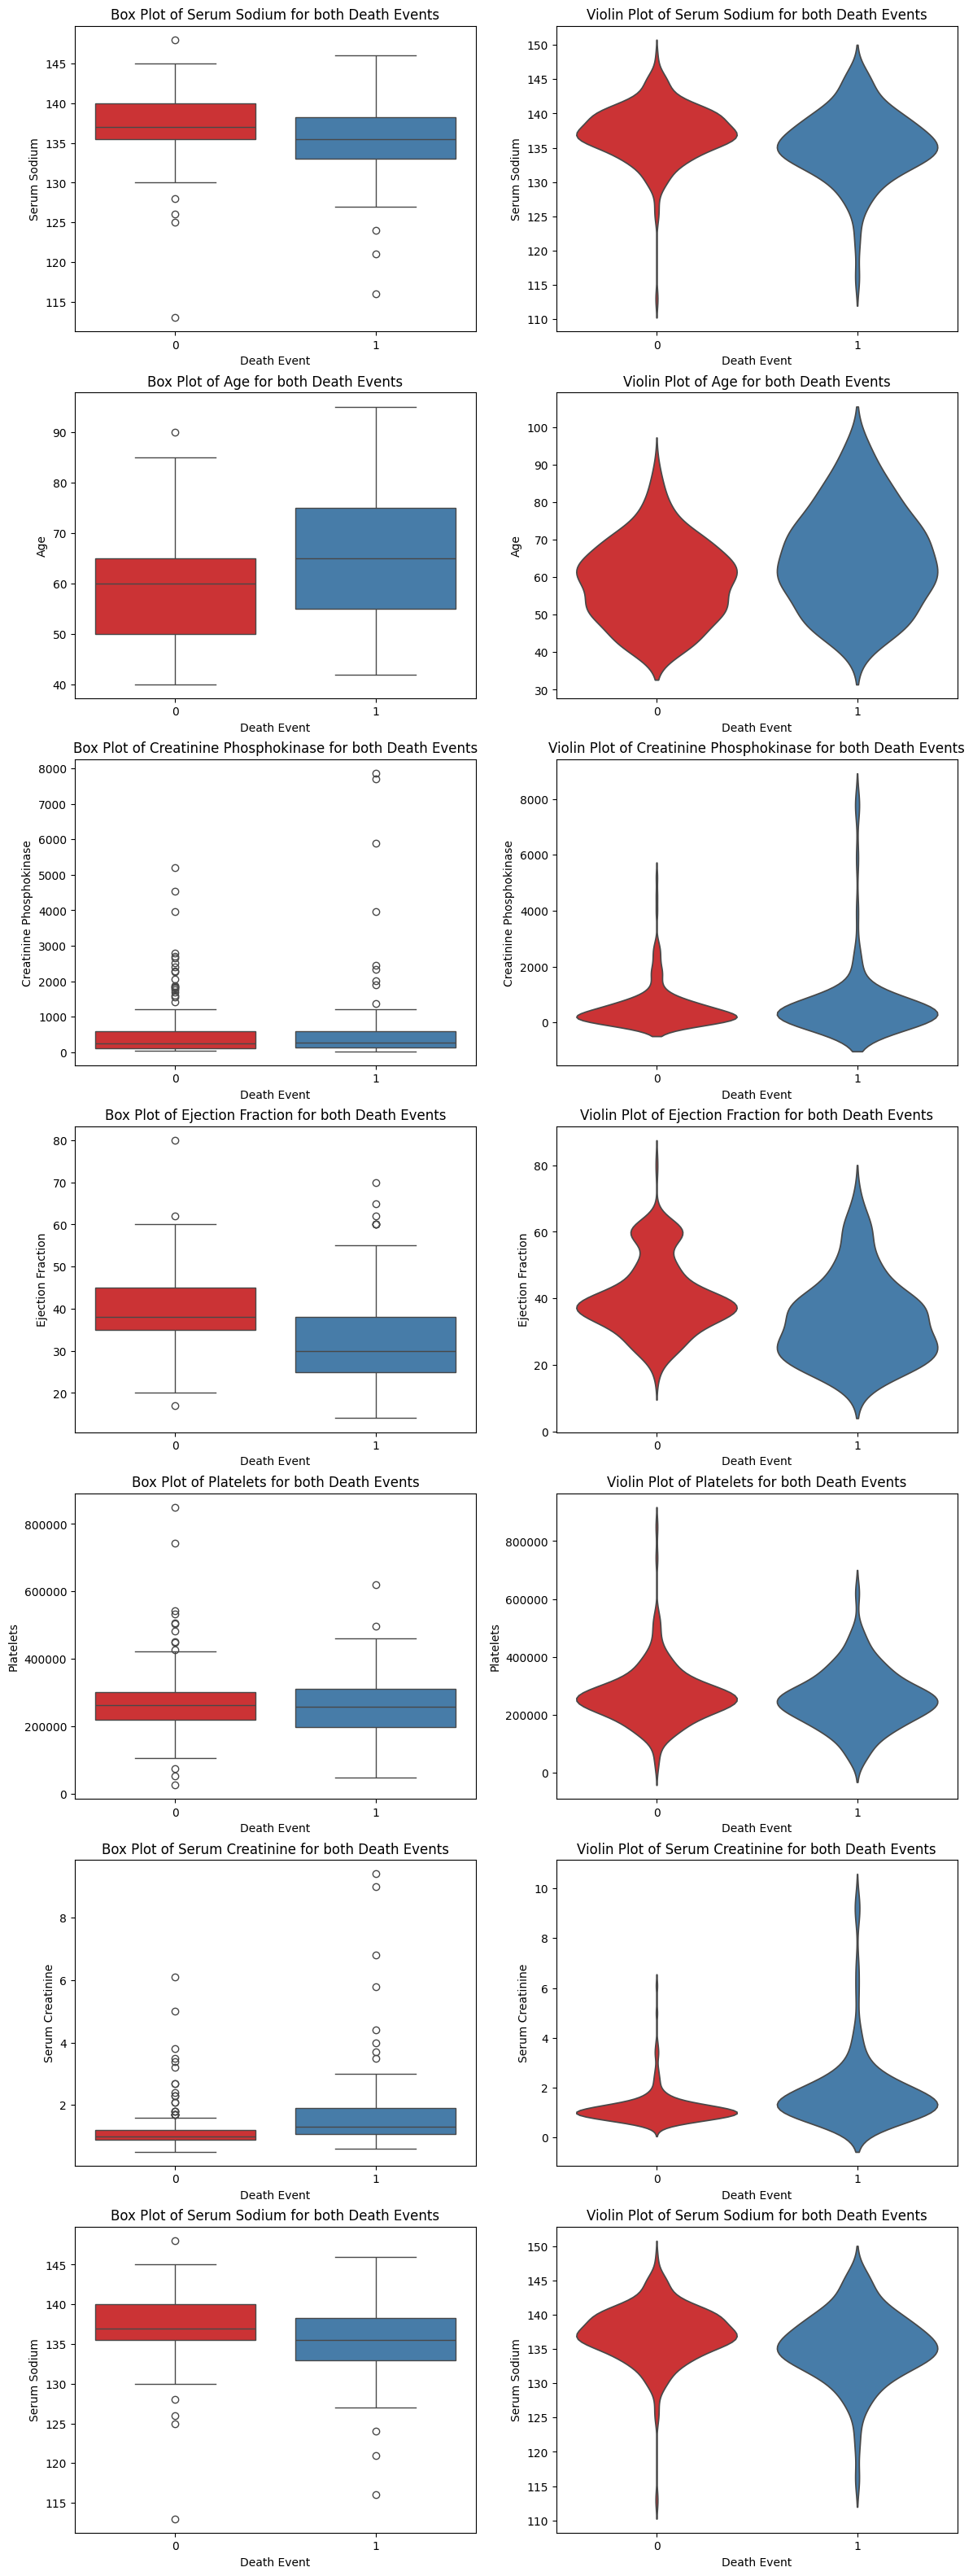

In [ ]:
colors = ["red", "darkblue"]
continuous_variables = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine",	"serum_sodium"]
fig, ax = plt.subplots(7, 2, figsize=(14, 40))

col_counter = 0
col_= 0
for row in range(7):
    col = continuous_variables[col_counter-1]
    sns.boxplot(x='DEATH_EVENT', y=col, data=records, ax=ax[row, col_], palette="Set1", legend=False, hue='DEATH_EVENT')
    ax[row, col_].set_xlabel('Death Event')
    ax[row, col_].set_ylabel(col.replace("_", " ").title())
    ax[row, col_].set_title(f'Box Plot of {col.replace("_", " ").title()} for both Death Events')

    sns.violinplot(x='DEATH_EVENT', y=col, data=records, inner=None, ax=ax[row, col_+1], palette="Set1", legend=False, hue='DEATH_EVENT')
    ax[row, col_+1].set_xlabel('Death Event')
    ax[row, col_+1].set_ylabel(col.replace("_", " ").title())
    ax[row, col_+1].set_title(f'Violin Plot of {col.replace("_", " ").title()} for both Death Events')
    col_counter += 1


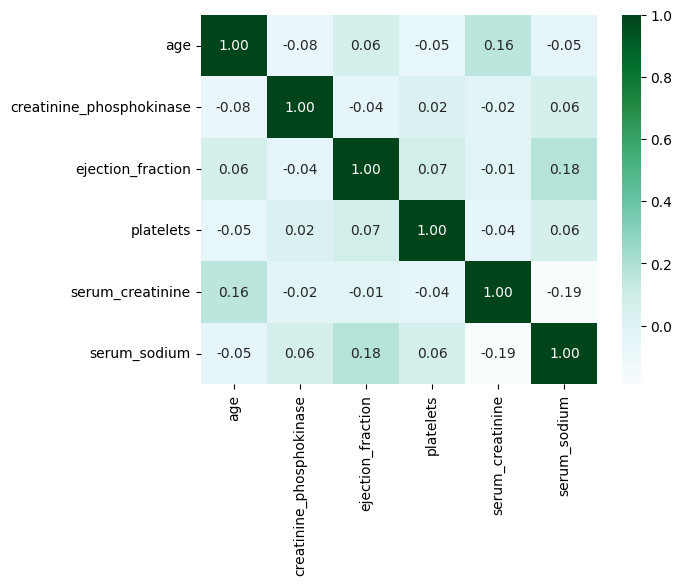

In [ ]:
numeric_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
sns.heatmap(records[numeric_columns].corr(), annot=True, fmt=".2f", cmap='BuGn')
plt.show()

In [ ]:
import scipy.stats as stats

def calculate_pvalues(df):
    pvals = pd.DataFrame({col: [stats.pearsonr(df[col], df[col2])[1] for col2 in df.columns] for col in df.columns})
    pvals.columns = df.columns
    pvals.index = df.columns
    return pvals

p_values = calculate_pvalues(records[numeric_columns])
print('p-values of correlation coefficients')
p_values

p-values of correlation coefficients


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
age,0.000000,0.159381,0.300304,0.366994,0.005803,0.428411
creatinine_phosphokinase,0.159381,0.000000,0.447623,0.673534,0.777514,0.304742
ejection_fraction,0.300304,0.447623,0.000000,0.213330,0.845686,0.002268
platelets,0.366994,0.673534,0.213330,0.000000,0.477891,0.284273
serum_creatinine,0.005803,0.777514,0.845686,0.477891,0.000000,0.001017
serum_sodium,0.428411,0.304742,0.002268,0.284273,0.001017,0.000000


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
agelabels = range(1,7)
records['age'] = pd.cut(records['age'], bins=6, labels=agelabels)

cplabels = range(1,9)
records['creatinine_phosphokinase'] = pd.cut(records['creatinine_phosphokinase'], bins=8, labels=cplabels)

eflabels = range(1,8)
records['ejection_fraction'] = pd.cut(records['ejection_fraction'], bins=7, labels=eflabels)

plateletslabels = range(1,7)
records['platelets'] = pd.cut(records['platelets'], bins=6, labels=plateletslabels)

sclabels = range(1,11)
records['serum_creatinine'] = pd.cut(records['serum_creatinine'], bins=10, labels=sclabels)

sslabels = range(1,5)
records['serum_sodium'] = pd.cut(records['serum_sodium'], bins=4, labels=sslabels)

In [ ]:
X = records.iloc[:, :11]
Y = records.iloc[:,11]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

categorical_nb = CategoricalNB()
model = categorical_nb.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
#lesser accuracy for cases where death actually occured

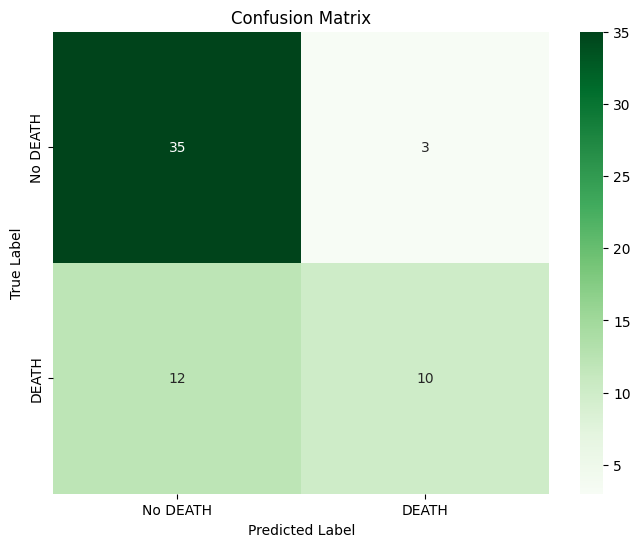

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['No DEATH', 'DEATH'], yticklabels=['No DEATH', 'DEATH'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        38
           1       0.77      0.45      0.57        22

    accuracy                           0.75        60
   macro avg       0.76      0.69      0.70        60
weighted avg       0.75      0.75      0.73        60



**Precision:** The ability of the classifier to not label a negative sample as positive.
* For class 0, the precision is 0.77, meaning that 77% of the instances predicted as class 0 are actually class 0.
* For class 1, the precision is 0.69, meaning that 69% of the instances predicted as class 1 are actually class 1.


**Recall (or Sensitivity):** The ability of the classifier to find all the positive samples.
* For class 0, the recall is 0.90, which means that the classifier correctly identifies 90% of all actual class 0 instances.
* For class 1, the recall is 0.45, indicating that it correctly identifies 45% of all actual class 1 instances.


**F1-Score:** The weighted harmonic mean of precision and recall. An F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.
* Class 0 has an F1 score of 0.83, which is relatively high, indicating a good balance between precision and recall.
* Class 1 has an F1 score of 0.55, which is lower, indicating that the classifier is not as effective at classifying instances of class 1.


**Support:** The number of actual occurrences of the class in the dataset.
* Class 0 has a support of 40, meaning there are 40 instances of class 0 in the test set.
* Class 1 has a support of 20, meaning there are 20 instances of class 1 in the test set.


**Accuracy:** The proportion of correct predictions (both true positives and true negatives) among the total number of cases examined. The overall accuracy here is 0.75 or 75%, which is moderate.

**Macro Average:** This is the average performance of the classifier across classes, giving equal weight to each class.Macro average precision is 0.73, recall is 0.68, and the F1-score is 0.69.

**Weighted Average:** This is the average performance of the classifier across classes, but each class is weighted by the number of instances in the test data. Weighted average precision is 0.74, recall is also 0.75, and the F1-score is 0.73.

These metrics are useful for understanding the performance of the classifier in more detail than accuracy alone could provide. The higher values for class 0 suggest that the classifier is better at predicting class 0 than class 1. The imbalance in support also indicates that the dataset may be imbalanced, which can affect the performance metrics of the classifier.

# Logistic Regression

In [ ]:
# Drop time column

# heart_failure_data = heart_failure_data.drop(columns='time')

In [ ]:
# Set features and predicted variable

X = heart_failure_data.drop('DEATH_EVENT', axis=1)
y = heart_failure_data['DEATH_EVENT']

In [ ]:
# 75-25 train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)

print("Train input shape:", X_train.shape)
print("Train output shape:", y_train.shape)
print("Test input shape:", X_test.shape)
print("Test output shape:", y_test.shape)

Train input shape: (224, 11)
Train output shape: (224,)
Test input shape: (75, 11)
Test output shape: (75,)


In [ ]:
# Standardize features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Logistic Regression Model

logreg = LogisticRegression(random_state=99)
logreg_model = logreg.fit(X_train_scaled, y_train)

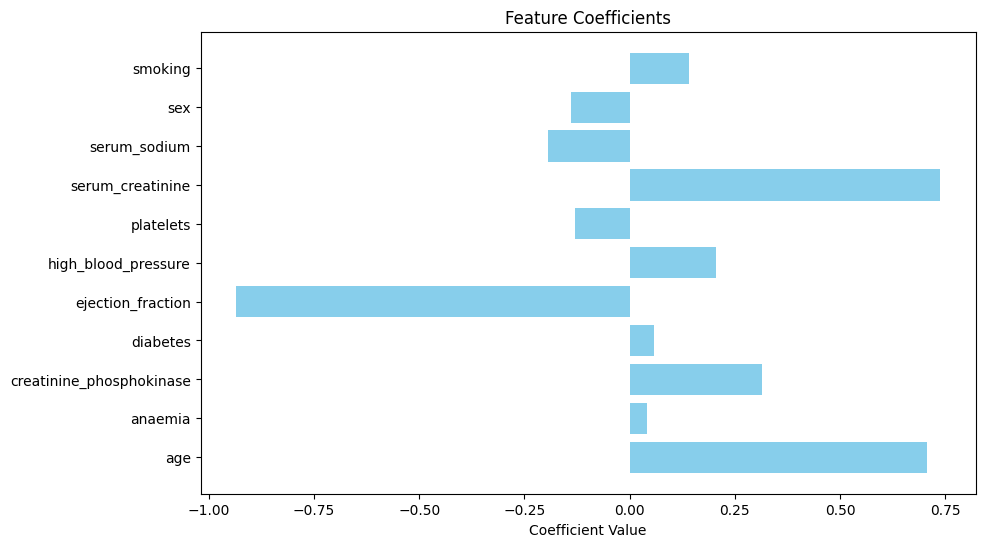

In [ ]:
# Coefficient Plot

feature_names = X.columns
coefficients = logreg.coef_.flatten()

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients')
plt.show()

In [ ]:
# Predicting on test data

y_pred = logreg_model.predict(X_test_scaled)

In [ ]:
# Evaluation

conf_matrix = confusion_matrix(y_test, y_pred)
# print("Accuracy: ",accuracy_score(y_test, y_pred))

# Calculating precision and recall
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]
false_negatives = conf_matrix[1, 0]
true_negatives=conf_matrix[0,0]

accuracy= (true_positives+true_negatives)/(true_positives+true_negatives+false_positives+false_negatives)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
print("Accuracy: ", accuracy )
print("Precision:", precision)
print("Recall:", recall)

Accuracy:  0.76
Precision: 0.6470588235294118
Recall: 0.4782608695652174


In [ ]:
# print(classification_report(y_test,y_pred))
# precision=precision_score(y_test,y_pred)

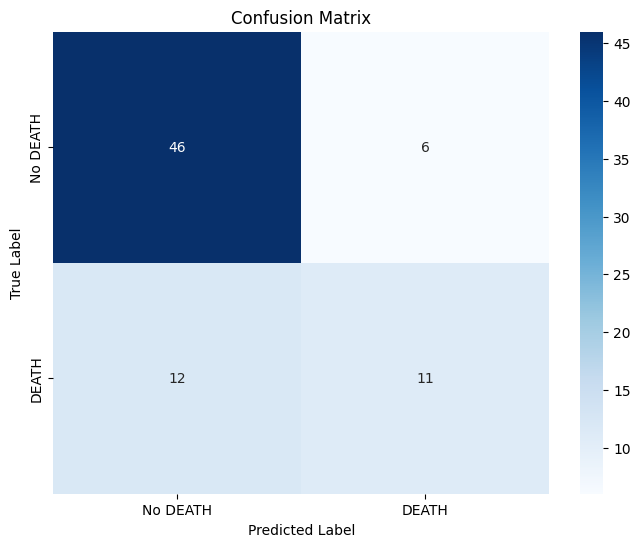

Accuracy: 0.76


In [ ]:
# Print results

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No DEATH', 'DEATH'], yticklabels=['No DEATH', 'DEATH'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Accuracy:", accuracy)

**Top-Left (True Negative, TN):**

46 instances where the model correctly predicted the negative class (no death). These are cases where the model predicted 'No DEATH' and the true label was indeed 'No DEATH'. This quadrant has 46 cases, indicating that the model correctly identified 46 individuals who did not experience the event of interest.

**Top-Right (False Positive, FP):**

6 instances where the model incorrectly predicted the positive class (death), while the actual class was negative (no death). These are cases where the model predicted 'DEATH' but the true label was 'No DEATH'. There are 6 cases of false alarms, where the model predicted an event that did not actually occur.

**Bottom-Left (False Negative, FN):**

12 instances where the model incorrectly predicted the negative class (no death), while the actual class was positive (death). These are the cases where the model predicted 'No DEATH' but the true label was 'DEATH'. There are 12 such cases, which are typically considered serious errors in medical predictions since they represent missed diagnoses.

**Bottom-Right (True Positive, TP):**

11 instances where the model correctly predicted the positive class (death). These are the cases where the model predicted 'DEATH' and the true label was also 'DEATH'. The model correctly identified 11 cases where the event of interest occurred.

###  Incorporating k-fold cross validation and hyperparameter tuning:

In [ ]:
# Define a grid of parameters over which to optimize the logistic regression

parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

In [ ]:
# Create a GridSearchCV object

grid_search = GridSearchCV(logreg, parameters, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the training data

grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=99), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [ ]:
# The best hyperparameters from GridSearchCV

best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
# Predicting on test data using the best model

y_pred_best = grid_search.predict(X_test_scaled)

In [ ]:
# Evaluation

conf_matrix_best = confusion_matrix(y_test, y_pred_best)
accuracy_best = accuracy_score(y_test, y_pred_best)
classification_report_best = classification_report(y_test, y_pred_best)

Best Parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validated Score: 0.7496969696969696
Test Set Accuracy: 0.7333333333333333


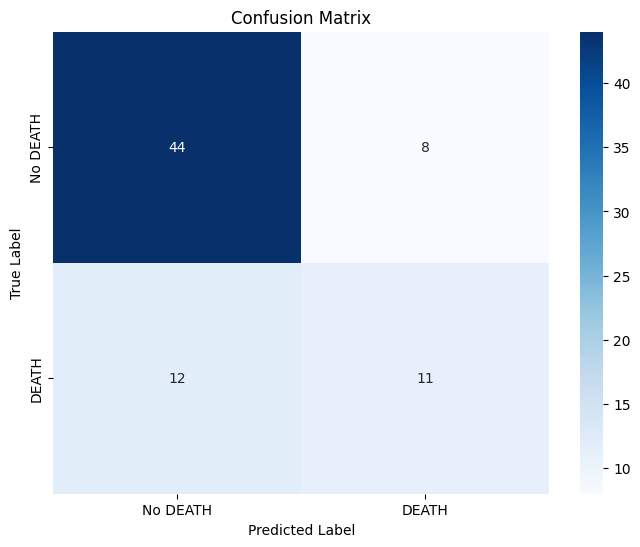


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        52
           1       0.58      0.48      0.52        23

    accuracy                           0.73        75
   macro avg       0.68      0.66      0.67        75
weighted avg       0.72      0.73      0.73        75



In [ ]:
# Print out the best parameters, best score, and evaluation metrics
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated Score: {best_score}")
print(f"Test Set Accuracy: {accuracy_best}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=['No DEATH', 'DEATH'], yticklabels=['No DEATH', 'DEATH'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nClassification Report:")
print(classification_report_best)


In [ ]:
# Calculating accuracy, precision and recall
true_positives_best = conf_matrix_best[1, 1]
false_positives_best = conf_matrix_best[0, 1]
false_negatives_best = conf_matrix_best[1, 0]
true_negatives_best=conf_matrix_best[0,0]

accuracy_best= (true_positives_best+true_negatives_best)/(true_positives_best+true_negatives_best+false_positives_best+false_negatives_best)
precision_best = true_positives_best / (true_positives_best + false_positives_best)
recall_best = true_positives_best / (true_positives_best + false_negatives_best)
print("Accuracy: ", accuracy_best )
print("Precision:", precision_best)
print("Recall:", recall_best)

Accuracy:  0.76
Precision: 0.6470588235294118
Recall: 0.4782608695652174


<h2>Decision Trees</h2>

In this portion, we will be using decision trees to make a heart failure prediction model.

Importing the necesaary libraries.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Reading the file and storing the contents in a dataframe.

In [ ]:
records = heart_failure_data
records.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,4,0,1,0,1,1,2,2,2,1,0,1
1,2,0,8,0,3,0,2,1,3,1,0,1
2,3,0,1,0,1,0,1,1,2,1,1,1
3,2,1,1,0,1,0,2,2,3,1,0,1
4,3,1,1,1,1,0,3,3,1,0,0,1


<h4>Cleaning the data and setting it up for use in the decision tree.</h4>

There are 6 categorical features (including death event, which is our output). These are, however, already encoded as 0 and 1 (true or false).
THere are 6 (continuous) numerical features.

The feature named 'time' is not useful for us in terms of model training. The time variable can be seen as an output variable (similar to 'DEATH_EVENT').Consequently, we will drop the column named time.
TODO: WRITE MORE INFORMATION ABOUT WHY WE'RE DROPPING TIME.

In [ ]:
# records.drop(columns=['time'], inplace=True)

Splitting the data into test and train data.

In [ ]:
shuffled_indices = np.random.permutation(len(records))
split_index = int(len(records) * 0.8)  # Calculate the split index for 80% training data

# Split the data
train_indices = shuffled_indices[:split_index]
test_indices = shuffled_indices[split_index:]
# print(f"train_indices: {train_indices}")
# print(f"test_indices: {test_indices}")

train_df = records.iloc[train_indices]
test_df = records.iloc[test_indices]

# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Print the number of rows in the training and test sets
print(f"Number of rows in the training set: {len(train_df)}")
print(f"Number of rows in the test set: {len(test_df)}")
print(f"test_df.shape = {test_df.shape}")
print(f"train_df.shape = {train_df.shape}")

Number of rows in the training set: 239
Number of rows in the test set: 60
test_df.shape = (60, 12)
train_df.shape = (239, 12)


Separating the input variables from the output variable.

In [ ]:
x_train = train_df.drop('DEATH_EVENT', axis=1)
y_train = train_df['DEATH_EVENT'].to_numpy()
x_test = test_df.drop('DEATH_EVENT', axis=1)
y_test = test_df['DEATH_EVENT'].to_numpy()
# print(f"x_train: {x_train} and shape is {x_train.shape}")
# print(f"x_test: {x_test} and shape is {x_test.shape}")

# print(x_train['age'])

Now, our data is in a form in which it can be directly used for training the decision tree model.
Next, we will build a class that builds the decision tree, given a choice of input and output features and the maximum depth.

<h4>The Decision Tree</h4>

In [ ]:
class Node:
    def __init__(self):
        self.split = {}
        self.left = None
        self.right = None

The Node class will be used to build the 'physical' decision tree.

In [ ]:
class DecisionTree:
    def __init__(self, max_depth=5):
        self.max_depth = max_depth
        # format of self.splits: {'feature_1': value_of_split, 'feature_2': value_of_split, ...}
        self.splits = []
        self.splits_2 = {}
        self.root = None
        # The root will be an object of the root class once the model has been trained


    def fit(self, x, y, depth=0, current_node=Node, side=None):
        current_depth = depth
        x_train = x
        y_train = y
        # format of x_list: {'feature_1': [value_1, value_2, value_3, ...], 'feature_2': [value_1, value_2, value_3, ...], ...}
        x_list = {}

        # adding all x points to a single array for easier coding:

        for column in x_train:
            # print(f"x_train.type = {type(x_train)}")
            x_list[column] = x_train[column].values

        # finding all splits so that their entropies can be found and the best split can be chosen
        # format of splits: {'feature_1': [split_1, split_2, split_3, ...], 'feature_2': {split_1, split_2, split_3, ...}, ...}
        # format of entropies: {'feature_1': {split: entropy, split: entropy}, 'feature_2': {split: entropy, split: entropy}}
        splits = {}
        entropies = {}
        for column in x_train:
            splits[column] = []
            self.splits_2[column] = []
            entropies[column] = {}

        # data structure for storing the closest splits:
        # format of closest: {'feature_1': [difference, value_1, value_2]}
        closest = {}
        # for column in x_train:


        for column in x_train:



            current_column_array = x_train[column].values

            for i in current_column_array:
                closest[column] = [999999, 0, 0]
                for j in current_column_array:
                    if i != j:
                        if abs(i - j) < closest[column][0]:
                            closest[column][0] = abs(i - j)
                            closest[column][1] = i
                            closest[column][2] = j

                # right now, j is the closest to i in the feature column
                # so we add the split between j and i to the splits dictionary
                # this is done AFTER checking that a split between i and j does not already exist
                split_exists = False
                for j in self.splits_2[column]:
                    if i > closest[column][2]:
                        if j < i and j > closest[column][2]:
                            split_exists = True
                    else:
                        if j > i and j < closest[column][2]:
                            split_exists = True

                if not split_exists:
                    self.splits_2[column].append((i + closest[column][2])/2)
                    splits[column].append((i + closest[column][2])/2)

        # right now, self.splits_2 contains all the possible splits.
        # next, we find the entropy of each split

        for column in x_train:
            for i in range(len(splits[column])):
                left = 0
                right = 0
                y_0_left = 0
                y_1_left = 0
                y_0_right = 0
                y_1_right = 0
                total = len(x_train[column])

                for j in range(total):
                    if x_list[column][j] < splits[column][i]:
                        left += 1
                        if y_train[j] == 0:
                            y_0_left += 1
                        elif y_train[j] == 1:
                            y_1_left += 1
                    elif x_list[column][j] > splits[column][i]:
                        right += 1
                        if y_train[j] == 0:
                            y_0_right += 1
                        elif y_train[j] == 1:
                            y_1_right += 1
                entropy_y_0_left = 0
                entropy_y_1_left = 0
                entropy_y_0_right = 0
                entropy_y_1_right = 0
                if left != 0:
                    if y_0_left/left != 0 and y_0_left/left != 0.0:
                        entropy_y_0_left = -(y_0_left/left)*math.log2(y_0_left/left)
                    if y_1_left/left != 0 and y_1_left/left != 0.0:
                        entropy_y_1_left = -(y_1_left/left)*math.log2(y_1_left/left)
                if right != 0:
                    if y_0_right/right != 0 and y_0_right/right != 0.0:
                        entropy_y_0_right = -(y_0_right/right)*math.log2(y_0_right/right)
                    if y_1_right/right != 0 and y_1_right/right != 0.0:
                        entropy_y_1_right = -(y_1_right/right)*math.log2(y_1_right/right)

                average_entropy = (left/total)*(entropy_y_0_left + entropy_y_1_left) + (right/total)*(entropy_y_0_right + entropy_y_1_right)

                entropies[column][splits[column][i]] = average_entropy

        # print(entropies)

        # now, we find the split with the lowest entropy
        lowest_feature = ""
        lowest_entropy = 1
        lowest_split = 9999
        for column in entropies:
            for split in entropies[column]:
                if entropies[column][split] < lowest_entropy:
                    lowest_feature = column
                    lowest_entropy = entropies[column][split]
                    lowest_split = split


        # print(f"lowest_feature: {lowest_feature}")
        # print(f"lowest_entropy: {lowest_entropy}")
        self.splits.append({lowest_feature: lowest_split})

        # splitting the data according to the split with the lowest entropy
        columns_list = x_train.columns.tolist()
        new_x_train_right = pd.DataFrame(columns=columns_list)
        new_x_train_left = pd.DataFrame(columns=columns_list)
        new_y_train_right = []
        new_y_train_left = []
        new_node = Node()
        new_node.split = {lowest_feature: lowest_split}
        y_counter = 0
        # print(f"type(x_train): {type(x_train)}")
        for index, row in x_train.iterrows():
            if row[lowest_feature] < lowest_split:
                # new_x_train_left = new_x_train_left.append(row)
                new_x_train_left.loc[len(new_x_train_left.index)] = row
                new_y_train_left.append(y_train[y_counter])
                y_counter += 1
            elif row[lowest_feature] > lowest_split:
                # new_x_train_right = new_x_train_right.append(row)
                new_x_train_right.loc[len(new_x_train_right.index)] = row
                new_y_train_right.append(y_train[y_counter])
                y_counter += 1

        current_depth += 1
        if side == 'left':
            current_node.left = new_node
        elif side == 'right':
            current_node.right = new_node

        if len(self.splits) == 1:
            self.root = new_node

        if current_depth >= self.max_depth:
            if new_y_train_left.count(0) > new_y_train_left.count(1):
                new_node.left = '0'
            else:
                new_node.left = '1'
            if new_y_train_right.count(0) > new_y_train_right.count(1):
                new_node.right = '0'
            else:
                new_node.right = '1'
        else:
            if 0 in new_y_train_left and 1 in new_y_train_left:
                self.fit(new_x_train_left, new_y_train_left, current_depth, new_node, 'left')
            else:
                if new_y_train_left.count(0) == 0:
                    label = '1'
                else:
                    label = '0'
                new_node.left = label
            if 0 in new_y_train_right and 1 in new_y_train_right:
                self.fit(new_x_train_right, new_y_train_right, current_depth, new_node, 'right')
            else:
                if new_y_train_right.count(0) == 0:
                    label = '1'
                else:
                    label = '0'
                new_node.right = label


    def predict(self, x):
        predictions = []
        for index, row in x.iterrows():
            current_node = self.root

            while True:
                split = current_node.split
                feature = next(iter(split))
                if row[feature] > split[feature]:
                    if current_node.right == '0' or current_node.right == '1':
                        predictions.append(int(current_node.right))
                        break
                    else:
                        current_node = current_node.right
                else:
                    if current_node.left == '0' or current_node.left == '1':
                        predictions.append(int(current_node.left))
                        break
                    else:
                        current_node = current_node.left
        return np.array(predictions)



    def print_tree(self, current_node=None):
        print(current_node.split)
        print('right:')
        if current_node.right == '0' or current_node.right == '1':
            print(current_node.right)
        else:
            self.print_tree(current_node.right)

        print(current_node.split)
        print('left:')
        if current_node.left == '0' or current_node.left == '1':
            print(current_node.left)
        else:
            self.print_tree(current_node.left)



    def print_splits(self):
        for column in self.splits_2:
            print(f"splits of {column}: \n{self.splits_2[column]}")


tree = DecisionTree()
tree.fit(x_train, y_train)
dt_y_pred = tree.predict(x_test)

true_positives = 0
true_negatives = 0
false_positives = 0
false_negatives = 0
for i in range(len(dt_y_pred)):
    if y_test[i] == 1 and dt_y_pred[i] == 1:
        true_positives += 1
    elif y_test[i] == 0 and dt_y_pred[i] == 0:
        true_negatives += 1
    elif y_test[i] == 0 and dt_y_pred[i] == 1:
        false_positives += 1
    elif y_test[i] == 1 and dt_y_pred[i] == 0:
        false_negatives += 1
accuracy = (true_positives + true_negatives)/len(dt_y_pred)
precision = true_positives/(true_positives + false_positives)
recall = true_positives/(true_positives + false_negatives)
f1 = 2 * ((precision*recall)/(precision+recall))

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')




Accuracy: 0.72
Precision: 0.62
Recall: 0.48
F1 Score: 0.54


In [ ]:
# tree.print_tree(tree.root)

From this tree, we can see that the most significant feature is serum_creatinine.

The accuracy we are getting from our own model is 76% using a maximum_depth of 5. This is a significant increase over the accuracy from the model by sickit-learn.

However, this is still not enough.

Now, we will vary the maximum_depth from 1 till 15 and observe how the accuracy changes.

In [ ]:
accuracies = []
recalls = []
depths = np.arange(1, 16)

for depth in depths:
    dt = DecisionTree(max_depth=depth)
    dt.fit(x_train, y_train)
    dt_y_pred = dt.predict(x_test)

    true_positives = 0
    true_negatives = 0
    false_positives = 0
    false_negatives = 0
    for i in range(len(dt_y_pred)):
        if y_test[i] == 1 and dt_y_pred[i] == 1:
            true_positives += 1
        elif y_test[i] == 0 and dt_y_pred[i] == 0:
            true_negatives += 1
        elif y_test[i] == 0 and dt_y_pred[i] == 1:
            false_positives += 1
        elif y_test[i] == 1 and dt_y_pred[i] == 0:
            false_negatives += 1
    accuracy = (true_positives + true_negatives)/len(dt_y_pred)
    recall = true_positives/(true_positives + false_negatives)
    accuracies.append(accuracy)
    recalls.append(recall)

[0.7166666666666667, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7166666666666667, 0.7166666666666667, 0.4666666666666667, 0.4666666666666667, 0.43333333333333335, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667, 0.4166666666666667]


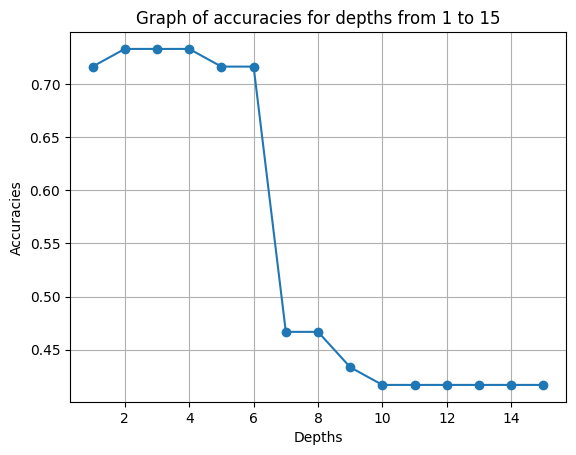

[0.5238095238095238, 0.5238095238095238, 0.6190476190476191, 0.5238095238095238, 0.47619047619047616, 0.6190476190476191, 0.8095238095238095, 0.8095238095238095, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571]


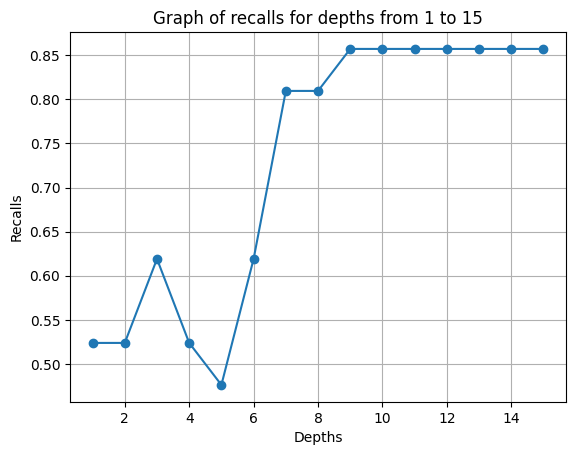

In [ ]:
plt.plot(depths, accuracies, marker='o', linestyle='-')
print(accuracies)

# Adding labels and title
plt.xlabel('Depths')
plt.ylabel('Accuracies')
plt.title('Graph of accuracies for depths from 1 to 15')

# Display the plot
plt.grid(True)
plt.show()

plt.plot(depths, recalls, marker='o', linestyle='-')
print(recalls)

# Adding labels and title
plt.xlabel('Depths')
plt.ylabel('Recalls')
plt.title('Graph of recalls for depths from 1 to 15')

# Display the plot
plt.grid(True)
plt.show()

The graph shows a maximum accuracy was acheived at a maximum_depth of 3, which was 80%.

<h2>A little theory</h2>

<b>Underfitting</b> happens when our model does not properly capture the trends that exist within the data. In the case of decision trees, this is happening at extremely low maximum_depths (1 and 2). This leads to a model with a lower accuracy.

<b>Overfitting</b> happens when our model has captured all the available patterns within our data, but the large value of maximum_depth forces it to make decision boundaries at places where they shouldn't exist (i.e., in places where the division of data is not significant enough). Although overfitting leads to a greater accuracy in the case of the training data (it will eventually lead to 100%), the accuracy starts to decrease if we test it on the testing data since the model will inaccurately classify the data.

<h2>Some Improvements</h2>

After running the code multiple times, we observed that the accuracy acheived varies everytime (which is why the printed values of accuracies might vary from the accuracies mentioned in the text). Upon reviewing the code from start till finish, we realized that the only randomness in our model is the selection of rows for the training and testing data.

This means that our model itself might be perfect, and it might be the data available to us that leads to the low accuracies.

To test this hyopthesis, we will create multiple training and testing data, each of variable splits (50-50, 55-45, 60-40, ..., 95-5).

In [ ]:
training_sets = []
testing_sets = []
splits_list = []
shuffled_indices = np.random.permutation(len(records))

for i in range(50, 96, 5):
  split_index = int(len(records) * i/100)  # Calculate the split index for 80% training data

  # Split the data
  train_indices = shuffled_indices[:split_index]
  test_indices = shuffled_indices[split_index:]
  # print(f"train_indices: {train_indices}")
  # print(f"test_indices: {test_indices}")

  train_df = records.iloc[train_indices]
  test_df = records.iloc[test_indices]
  training_sets.append(train_df)
  testing_sets.append(test_df)
  splits_list.append(f"Train: {i}, Test: {100-i}")

print(f"splits_list: {splits_list}")
# print(f"training_sets: {training_sets}")
# print(f"testing_sets: {testing_sets}")

splits_list: ['Train: 50, Test: 50', 'Train: 55, Test: 45', 'Train: 60, Test: 40', 'Train: 65, Test: 35', 'Train: 70, Test: 30', 'Train: 75, Test: 25', 'Train: 80, Test: 20', 'Train: 85, Test: 15', 'Train: 90, Test: 10', 'Train: 95, Test: 5']


Next, we will create a model for each of these splits for maximum_depths ranging from 1-15 and will plot a graph of the maximum accuracy against the split to see how it varies.

In [ ]:
max_accuracies = []
max_recalls = []
for i in range(len(training_sets)):
  train_df = training_sets[i]
  test_df = testing_sets[i]

  x_train = train_df.drop('DEATH_EVENT', axis=1)
  y_train = train_df['DEATH_EVENT'].to_numpy()
  x_test = test_df.drop('DEATH_EVENT', axis=1)
  y_test = test_df['DEATH_EVENT'].to_numpy()

  accuracies = []
  recalls = []
  depths = np.arange(1, 16)

  print(f"Current split:     |     Train: {len(x_train)/(len(x_train) + len(x_test))}     |     Test: {len(x_test)/(len(x_train) + len(x_test))}")

  for depth in depths:
      dt = DecisionTree(max_depth=depth)
      dt.fit(x_train, y_train)
      dt_y_pred = dt.predict(x_test)

      true_positives = 0
      true_negatives = 0
      false_positives = 0
      false_negatives = 0
      for i in range(len(dt_y_pred)):
          if y_test[i] == 1 and dt_y_pred[i] == 1:
              true_positives += 1
          elif y_test[i] == 0 and dt_y_pred[i] == 0:
              true_negatives += 1
          elif y_test[i] == 0 and dt_y_pred[i] == 1:
              false_positives += 1
          elif y_test[i] == 1 and dt_y_pred[i] == 0:
              false_negatives += 1
      accuracy = (true_positives + true_negatives)/len(dt_y_pred)
      recall = true_positives/(true_positives + false_negatives)
      accuracies.append(accuracy)
      recalls.append(recall)
  # print(f"Accuracies: {accuracies}")
  max_accuracies.append(max(accuracies))
  print(f"Max Accuracy: {max(accuracies)}")
  max_recalls.append(max(recalls))


Current split:     |     Train: 0.4983277591973244     |     Test: 0.5016722408026756
Max Accuracy: 0.7
Current split:     |     Train: 0.5484949832775919     |     Test: 0.451505016722408
Max Accuracy: 0.7481481481481481
Current split:     |     Train: 0.5986622073578596     |     Test: 0.4013377926421405
Max Accuracy: 0.7083333333333334
Current split:     |     Train: 0.6488294314381271     |     Test: 0.3511705685618729
Max Accuracy: 0.7523809523809524
Current split:     |     Train: 0.6989966555183946     |     Test: 0.3010033444816054
Max Accuracy: 0.6888888888888889
Current split:     |     Train: 0.7491638795986622     |     Test: 0.2508361204013378
Max Accuracy: 0.6533333333333333
Current split:     |     Train: 0.7993311036789298     |     Test: 0.20066889632107024
Max Accuracy: 0.7333333333333333
Current split:     |     Train: 0.8494983277591973     |     Test: 0.1505016722408027
Max Accuracy: 0.7111111111111111
Current split:     |     Train: 0.8996655518394648     |     Te

Plotting the graph

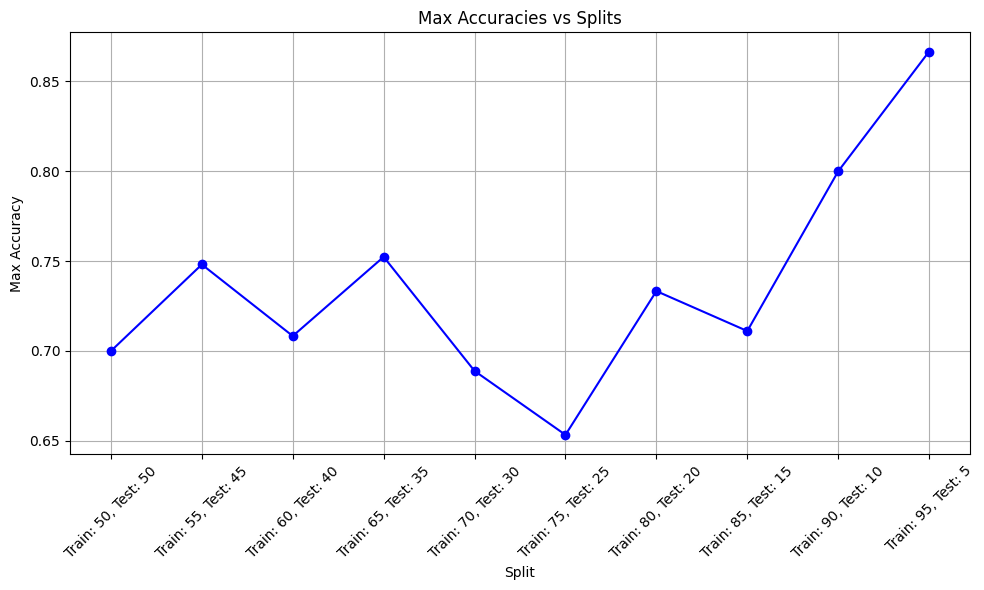

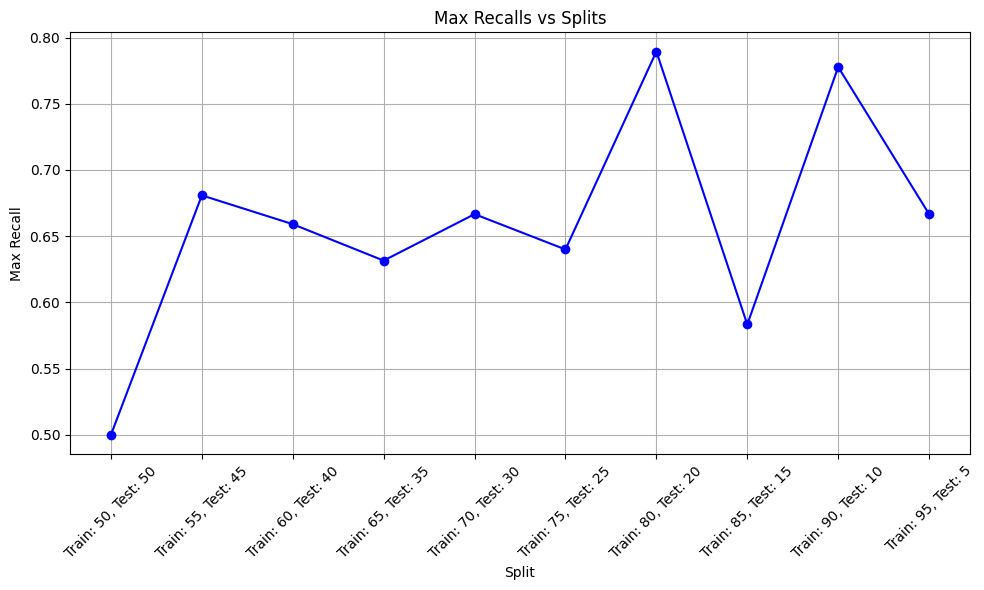

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(splits_list, max_accuracies, marker='o', color='b', linestyle='-')

# Set the title and labels
plt.title('Max Accuracies vs Splits')
plt.xlabel('Split')
plt.xticks(rotation=45)
plt.ylabel('Max Accuracy')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(splits_list, max_recalls, marker='o', color='b', linestyle='-')

# Set the title and labels
plt.title('Max Recalls vs Splits')
plt.xlabel('Split')
plt.xticks(rotation=45)
plt.ylabel('Max Recall')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

The graph does not show the expected output. We expected the maximum accuracy to show a constant increase as the train/test split ratio increases.

The unexpected output of the graph maybe, again, be due to the small size of the dataset.

To test this new hypothesis, we will again use various sizes of the training data and find the maximum accuracy. However, we will keep the testing data the same. We will initialize the testing data at the beginning, using 10% of the data. We will vary the training data from 50% to 90% and will calculate the accuracy against the same testing data.

In [ ]:
training_sets = []
testing_sets = []
splits_list = []
shuffled_indices = np.random.permutation(len(records))

split_index = int(len(records) * 0.9)
test_indices = shuffled_indices[split_index:]
test_df = records.iloc[test_indices]
train_indices = shuffled_indices[:split_index]
records_2 = records.iloc[train_indices]
# print(type(records))
# print(type(records_2))

# print(len(test_df))
# print(len(records_2))
# print(len(records))
records_2 = records_2.reset_index(drop=True)
shuffled_indices = np.random.permutation(len(records_2))
# print(records_2.head())

for i in range(20, 91, 10):
  split_index = int(len(records_2) * i/100)  # Calculate the split index for 80% training data

  # Split the data
  train_indices = shuffled_indices[:split_index]
  # print(f"train_indices: {train_indices}")
  # print(f"test_indices: {test_indices}")

  train_df = records_2.iloc[train_indices]

  training_sets.append(train_df)
  testing_sets.append(test_df)
  splits_list.append(f"Train: {i}, Test: {10}")

print(f"splits_list: {splits_list}")
# print(f"training_sets: {training_sets}")
# print(f"testing_sets: {testing_sets}")

splits_list: ['Train: 20, Test: 10', 'Train: 30, Test: 10', 'Train: 40, Test: 10', 'Train: 50, Test: 10', 'Train: 60, Test: 10', 'Train: 70, Test: 10', 'Train: 80, Test: 10', 'Train: 90, Test: 10']


In [ ]:
max_accuracies = []
mean_accuracies = []
max_recalls = []
for i in range(len(training_sets)):
  train_df = training_sets[i]
  test_df = testing_sets[i]

  x_train = train_df.drop('DEATH_EVENT', axis=1)
  y_train = train_df['DEATH_EVENT'].to_numpy()
  x_test = test_df.drop('DEATH_EVENT', axis=1)
  y_test = test_df['DEATH_EVENT'].to_numpy()

  accuracies = []
  recalls = []
  depths = np.arange(1, 16)

  print(f"Current split:     |     Train: {len(x_train)/(len(x_train) + len(x_test))}     |     Test: {len(x_test)/(len(x_train) + len(x_test))}")

  for depth in depths:
      dt = DecisionTree(max_depth=depth)
      dt.fit(x_train, y_train)
      dt_y_pred = dt.predict(x_test)

      true_positives = 0
      true_negatives = 0
      false_positives = 0
      false_negatives = 0
      for i in range(len(dt_y_pred)):
          if y_test[i] == 1 and dt_y_pred[i] == 1:
              true_positives += 1
          elif y_test[i] == 0 and dt_y_pred[i] == 0:
              true_negatives += 1
          elif y_test[i] == 0 and dt_y_pred[i] == 1:
              false_positives += 1
          elif y_test[i] == 1 and dt_y_pred[i] == 0:
              false_negatives += 1
      accuracy = (true_positives + true_negatives)/len(dt_y_pred)
      recall = true_positives/(true_positives + false_negatives)
      accuracies.append(accuracy)
      recalls.append(recall)
  print(f"Accuracies: {accuracies}")
  max_accuracies.append(max(accuracies))
  print(f"Max Accuracy: {max(accuracies)}")
  max_recalls.append(max(recalls))
  # mean_accuracies.append(np.mean(accuracies))
  # print(f"Mean Accuracy: {np.mean(accuracies)}")


Current split:     |     Train: 0.6385542168674698     |     Test: 0.3614457831325301
Accuracies: [0.5666666666666667, 0.6333333333333333, 0.7, 0.6333333333333333, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]
Max Accuracy: 0.7
Current split:     |     Train: 0.7272727272727273     |     Test: 0.2727272727272727
Accuracies: [0.6, 0.6666666666666666, 0.7666666666666667, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]
Max Accuracy: 0.7666666666666667
Current split:     |     Train: 0.781021897810219     |     Test: 0.21897810218978103
Accuracies: [0.4666666666666667, 0.4666666666666667, 0.6333333333333333, 0.6, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.633333333333333

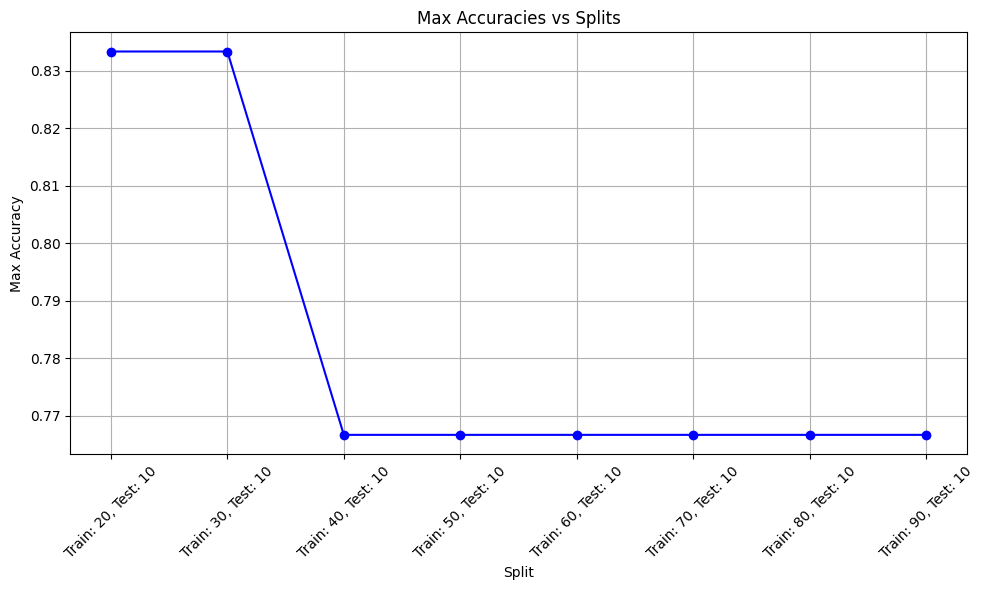

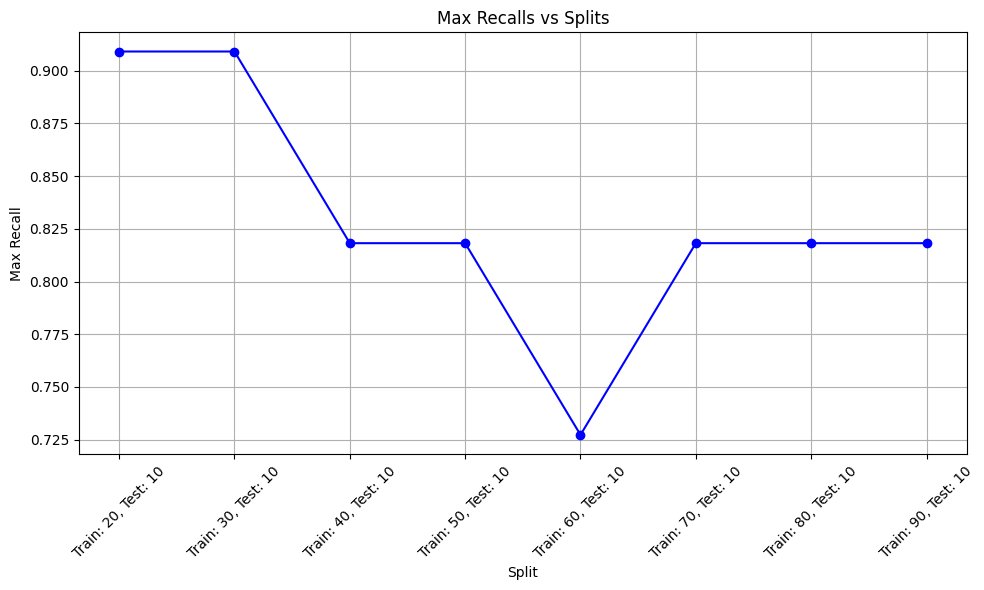

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(splits_list, max_accuracies, marker='o', color='b', linestyle='-')

# Set the title and labels
plt.title('Max Accuracies vs Splits')
plt.xlabel('Split')
plt.xticks(rotation=45)
plt.ylabel('Max Accuracy')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# plt.plot(splits_list, mean_accuracies, marker='o', color='b', linestyle='-')

# # Set the title and labels
# plt.title('Mean Accuracies vs Splits')
# plt.xlabel('Split')
# plt.xticks(rotation=45)
# plt.ylabel('Mean Accuracy')

# # Display the plot
# plt.grid(True)
# plt.tight_layout()
plt.figure(figsize=(10, 6))
plt.plot(splits_list, max_recalls, marker='o', color='b', linestyle='-')

# Set the title and labels
plt.title('Max Recalls vs Splits')
plt.xlabel('Split')
plt.xticks(rotation=45)
plt.ylabel('Max Recall')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()



This new graph now follows a trend that <b>mostly</b> confirms the hypothesis that the limited accuracy of our model is due to the limited data available to us. This proves that the model itself is fine and to make it perform better, we would need a larger dataset.